<b> Many of our known Libraries are outdated in google colab. So before we begin we update them.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%pip uninstall numpy
%pip install --upgrade numpy;
%pip install --upgrade pandas;
%pip install --upgrade seaborn;
%pip install --upgrade matplotlib;
%pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<b> Import initial dependencies. Also setting the plotting enviroment of matplotlib for future visualization. Last but not least, load our images from local google drive.

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid',color_codes=True)
%matplotlib inline  
style.use('fivethirtyeight')
import os
print(os.listdir('/content/drive/MyDrive/MiniProject/flowers'))


['daisy', 'rose', 'sunflower', 'tulip', 'dandelion']


<b>Initializing vectors X, Z who will be used later on to fill with the images and their labels respectively. Also, we set the directory for each category of flower.

In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/drive/MyDrive/MiniProject/flowers/daisy'
FLOWER_DANDI_DIR='/content/drive/MyDrive/MiniProject/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/MiniProject/flowers/rose'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/MiniProject/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/MiniProject/flowers/tulip'

<b> We now create the functions assign label and make train data to fill X & Z.

In [ ]:
import cv2
from tqdm import tqdm
def assign_label(img,flower_type):
    return flower_type
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

<b> We now fill our arrays.

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
make_train_data('Tulip',FLOWER_TULIP_DIR)
make_train_data('Dandelion',FLOWER_DANDI_DIR)
make_train_data('Rose',FLOWER_ROSE_DIR)
print('\n Lenght of X:',len(X))

100%|██████████| 784/784 [00:10<00:00, 77.40it/s] 


 Lenght of X: 4317


<b>Let's now randomly visualize a few of the images of our dataset. 

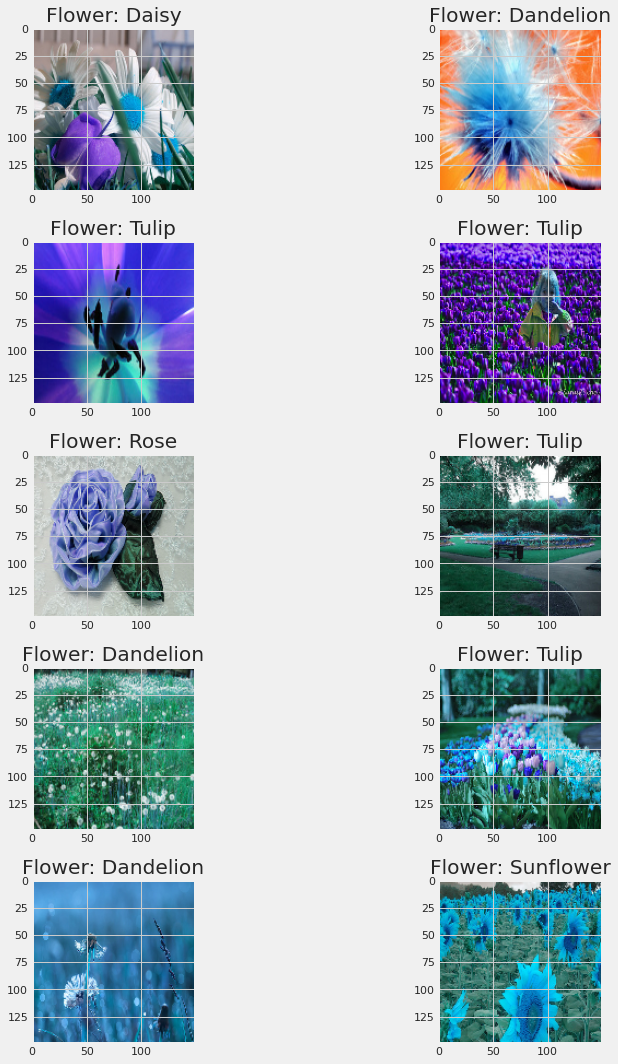

In [ ]:
import random as rn
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

<b> The possible values for each pixel are 0 to 256. A color code is represented by each digit. The computation of high numeric values may become more difficult when using the image as-is and running it through a Deep Neural Network. We can normalize the data to fall between 0 and 1 to lessen this. The calculations will be simpler and quicker because the numbers will be tiny. Since pixel values vary from 0 to 256, the range is 255 except for 0. Therefore, dividing all of the values by 255 will change the range to be from 0 to 1.<br> Furthermore, with the help of Label Encoder we will turn the string Z array which contains the name of the flower depicted in each image, into the Y array which will contain categorical values for each flower (i.e. 0 for Daisy, 1 for Rose,..., 5 for Dandelion). 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

<b> Split the dataset into train-test with 20% test size.<br>
A random seed is used to ensure that results are reproducible. In other words, using this parameter makes sure that anyone who re-runs our code will get the exact same outputs.


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state= 50)
np.random.seed(50)
rn.seed(50)
tf.random.set_seed(50)

<b>Building ConvNet Model <br> Adding ConV2D layers in which set activation function to 'relu', and apply max pooling to reduce the spatial dimension of data

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

<b>Add more layers to feed inputs to neural networks, set activation function

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Activation

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

<b>Reduce the learning rate when the validation accuracy does not improve after 3 epochs using LR Annealer 

In [ ]:
batch_size=128
epochs=50
from keras.callbacks import ReduceLROnPlateau

red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

<b> Prevent overfitting by increasing data using data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest') 


datagen.fit(X_train)

<b> Compile the model

In [ ]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [ ]:
his = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
26/26 [==============================] - 28s 673ms/step - loss: 1.4409 - accuracy: 0.3645 - val_loss: 1.1962 - val_accuracy: 0.5093
Epoch 2/50
26/26 [==============================] - 16s 606ms/step - loss: 1.1580 - accuracy: 0.5098 - val_loss: 1.0961 - val_accuracy: 0.5787
Epoch 3/50
26/26 [==============================] - 16s 597ms/step - loss: 1.0885 - accuracy: 0.5606 - val_loss: 0.9484 - val_accuracy: 0.6296
Epoch 4/50
26/26 [==============================] - 16s 602ms/step - loss: 0.9921 - accuracy: 0.6033 - val_loss: 0.9960 - val_accuracy: 0.6065
Epoch 5/50
26/26 [==============================] - 16s 597ms/step - loss: 0.9608 - accuracy: 0.6259 - val_loss: 0.9238 - val_accuracy: 0.6331
Epoch 6/50
26/26 [==============================] - 15s 592ms/step - loss: 0.9048 - accuracy: 0.6517 - val_loss: 0.8266 - val_accuracy: 0.6968
Epoch 7/50
26/26 [==============================] - 15s 592ms/step - loss: 0.8899 - accuracy: 0.6608 - val_loss: 0.8638 - val_accuracy: 0.6759

<b>Evaluate the model performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def model_Evaluate(model):
    
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred>=0.5, 1, 0)


    print(classification_report(y_test, y_pred))
    print('Model Score:',round(accuracy_score(y_test, y_pred),2)*100)
    y_pred_class = np.argmax(y_pred, axis=1)
    y_test_class = np.argmax(y_test, axis=1)
    cf_matrix = confusion_matrix(y_pred_class, y_test_class)
    print("Confusion matrix:","\n",cf_matrix)

In [ ]:
model_Evaluate(model)

27/27 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.91      0.80      0.86       158
           1       0.86      0.78      0.82       204
           2       0.66      0.90      0.76       176
           3       0.87      0.91      0.89       135
           4       0.89      0.53      0.66       191

   micro avg       0.82      0.77      0.80       864
   macro avg       0.84      0.79      0.80       864
weighted avg       0.84      0.77      0.79       864
 samples avg       0.77      0.77      0.77       864

Model Score: 77.0
Confusion matrix: 
 [[136  22   8   2  16]
 [  9 160   4   6   7]
 [  8   9 158   2  62]
 [  3  10   1 123   5]
 [  2   3   5   2 101]]


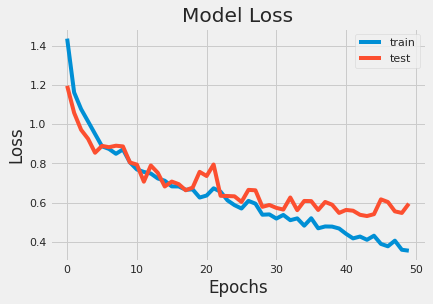

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

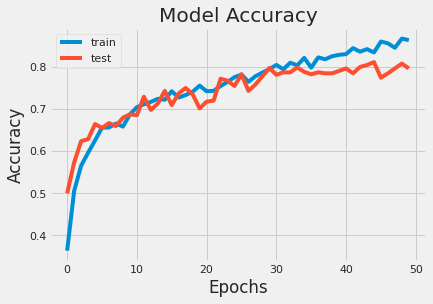

In [ ]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

<b>Get predictions on test set

In [ ]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)

27/27 [==============================] - 0s 12ms/step


<b>Store properly and misclassified indexes

In [ ]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

<b>Visualize correctly classified flower images

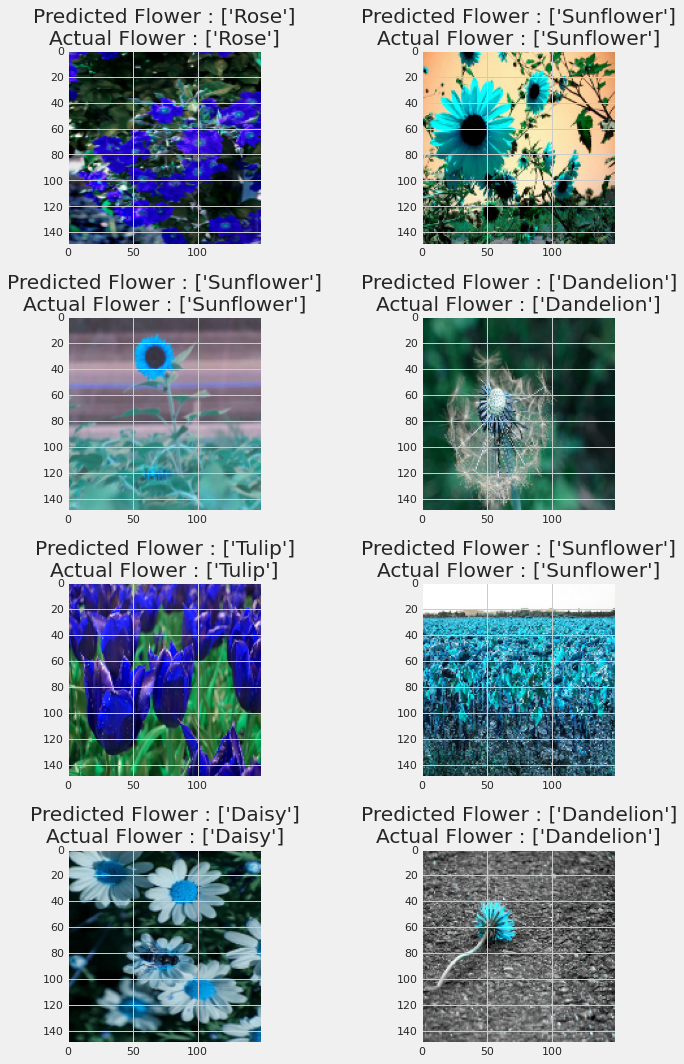

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

<b>Missclassified images of flowers

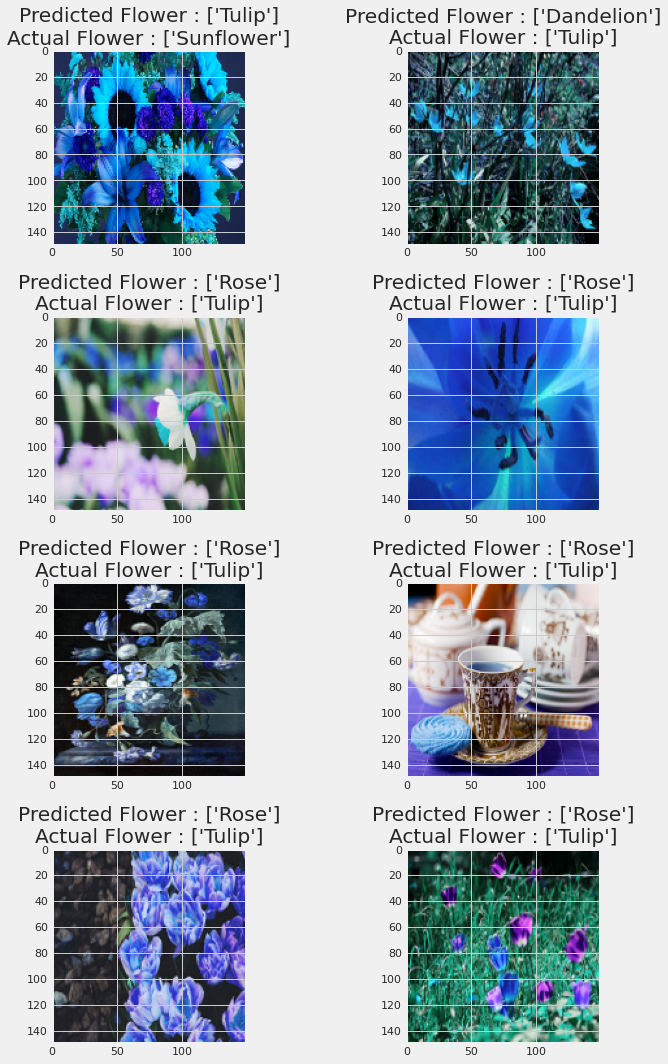

In [ ]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1